In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
def read_merged(weather, year):
    return pd.read_csv('../../merged/merged_{}_{}.csv.gz'.format(weather, year)).drop(columns=['Unnamed: 0'])

In [3]:
storm = read_merged('storm', 2020)

In [4]:
storm.head()

,DATE,MONTH,LAT,LON,MAX_REFLECT,VIL,HEIGHT,COUNTY,STATE,POWER_OUTAGE
0,2020-01-01,1,45.531415,-98.985618,38,1,3.2,Edmunds County,South Dakota,False
1,2020-01-01,1,45.057635,-98.531035,38,0,2.9,Spink County,South Dakota,False
2,2020-01-01,1,45.122425,-97.951135,40,1,2.1,Clark County,South Dakota,False
3,2020-01-01,1,45.072180,-97.959420,35,0,2.2,Clark County,South Dakota,False
4,2020-01-01,1,24.273560,-80.413000,47,6,8.8,Monroe County,Florida,False


In [5]:
storm['POWER_OUTAGE'].value_counts(normalize=True)

POWER_OUTAGE
False    0.978202
True     0.021798
Name: proportion, dtype: float64

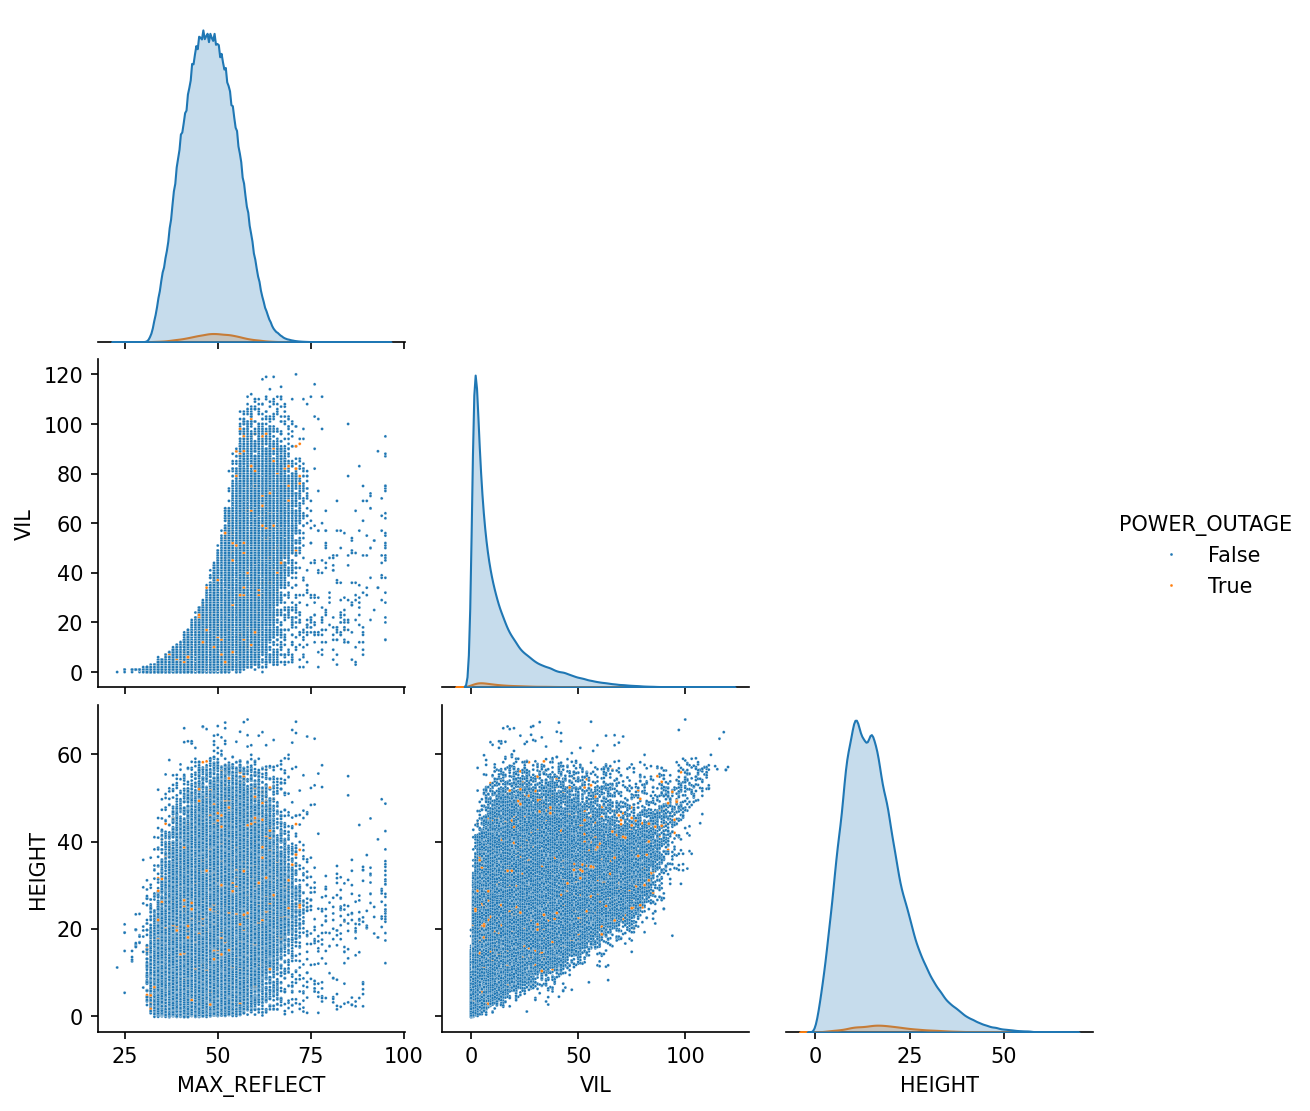

In [7]:
st = storm.sample(frac=0.1)
sns.pairplot(st, x_vars=['MAX_REFLECT','VIL','HEIGHT'],
                 y_vars=['MAX_REFLECT', 'VIL', 'HEIGHT'],
                 hue='POWER_OUTAGE',  plot_kws={'s': 2}, corner=True)

In [8]:
outage = storm[storm['POWER_OUTAGE']==True]
no_outage = storm[storm['POWER_OUTAGE']==False]
no_outage = no_outage.sample(n=len(outage))
storm_balanced = pd.concat([outage, no_outage],axis=0)

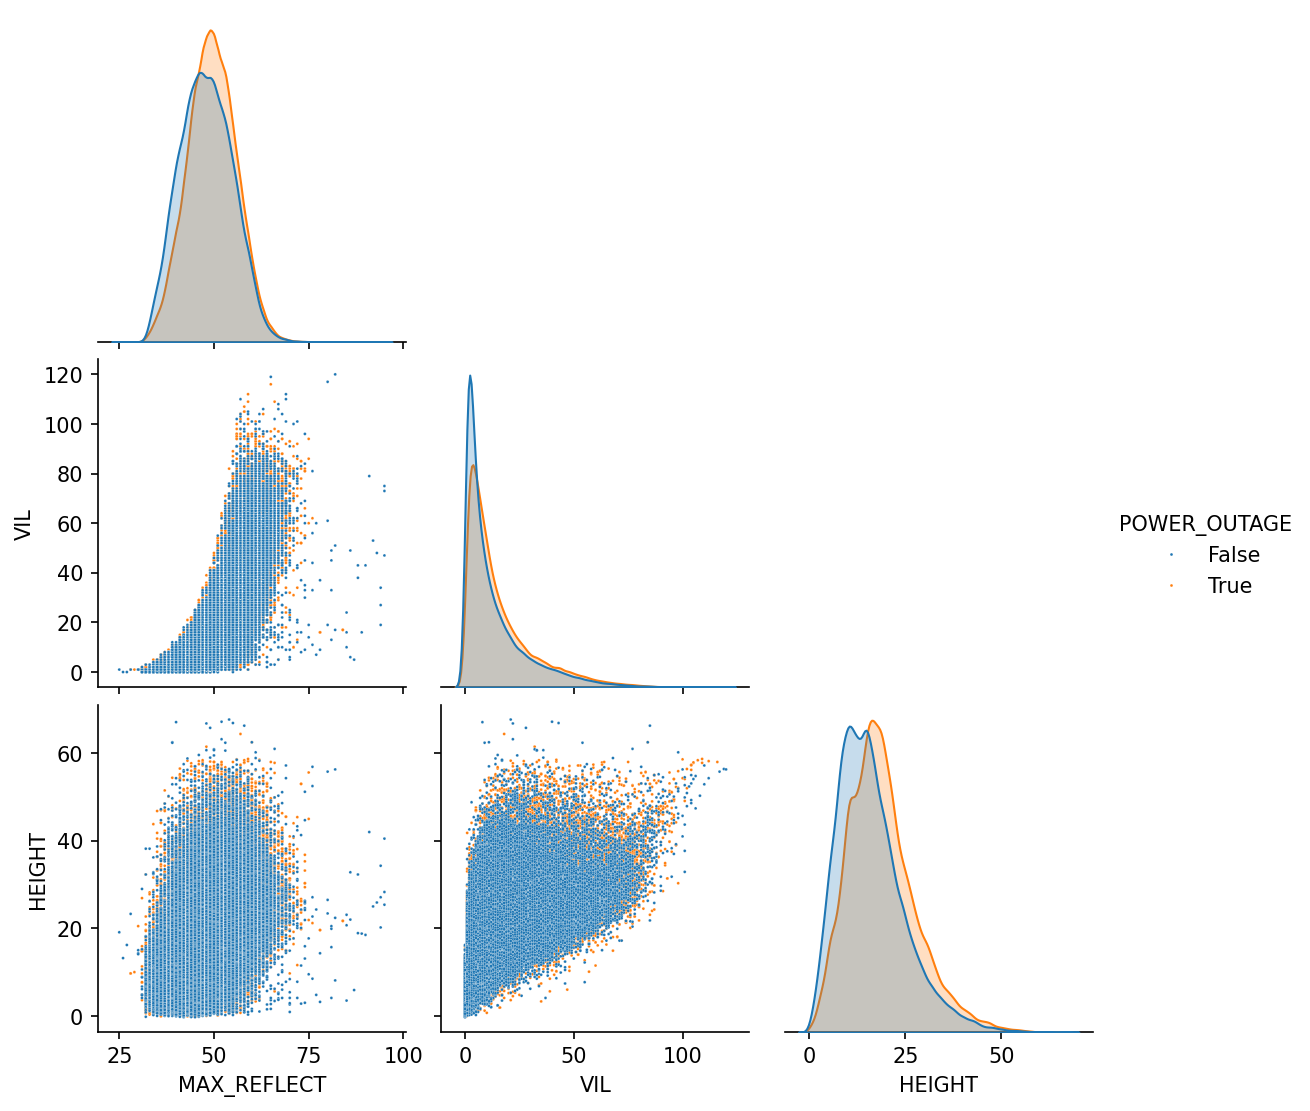

In [10]:
sns.pairplot(storm_balanced, x_vars=['MAX_REFLECT','VIL','HEIGHT'],
                             y_vars=['MAX_REFLECT', 'VIL', 'HEIGHT'],
                             hue='POWER_OUTAGE',  plot_kws={'s': 2}, corner=True)